In [ ]:
"""
Created on Mon Jul 15 08:27:42 2019

@author: KJee
"""

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from descartes import PolygonPatch
sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

In [2]:
matches = pd.read_csv("../dataset/matches.csv", header=0)

In [3]:
matches.head(2)

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,assists team1,assists team2,on target attempts team1,on target attempts team2,off target attempts team1,off target attempts team2,attempts inside the penalty area team1,attempts inside the penalty area team2,attempts outside the penalty area team1,attempts outside the penalty area team2,left channel team1,left channel team2,left inside channel team1,left inside channel team2,central channel team1,central channel team2,right inside channel team1,right inside channel team2,right channel team1,right channel team2,total offers to receive team1,total offers to receive team2,inbehind offers to receive team1,inbehind offers to receive team2,inbetween offers to receive team1,inbetween offers to receive team2,infront offers to receive team1,infront offers to receive team2,receptions between midfield and defensive lines team1,receptions between midfield and defensive lines team2,attempted line breaks team1,attempted line breaks team2,completed line breaksteam1,completed line breaks team2,attempted defensive line breaks team1,attempted defensive line breaks team2,completed defensive line breaks team1,completed defensive line breaks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2,fouls against team1,fouls against team2,offsides team1,offsides team2,passes team1,passes team2,passes completed team1,passes completed team2,crosses team1,crosses team2,crosses completed team1,crosses completed team2,switches of play completed team1,switches of play completed team2,corners team1,corners team2,free kicks team1,free kicks team2,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 nov. 2022,17 : 00,Group A,5,6,2,0,0,2,0,0,0,1,0,3,5,3,2,4,3,2,15,8,0,7,3,6,1,4,9,6,520,532,116,127,235,187,169,218,5,8,136,155,86,99,9,13,4,7,4,2,0,0,15,15,3,4,450,480,381,409,9,14,4,4,9,9,1,3,19,17,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 nov. 2022,14 : 00,Group B,13,8,2,6,6,2,0,0,6,1,7,3,3,4,10,6,3,2,11,3,5,0,2,3,3,1,11,0,1061,212,207,53,386,86,468,73,16,4,238,101,178,45,25,7,16,4,0,2,0,0,9,14,2,2,809,224,730,154,23,8,7,1,12,3,8,0,16,10,0,1,8,13,0,0,63,72,139,416


## Some data pre-processing

### Renaming columns accordingly

In [4]:
def replace_spaces(s):
    return s.replace(" ", "_")

In [5]:
new_columns = {}
for col in matches.columns:
    new_columns[col] = replace_spaces(col).upper()
    
matches = matches.rename(columns=new_columns)
matches = matches.rename(columns={'COMPLETED_LINE_BREAKSTEAM1': 'COMPLETED_LINE_BREAKS_TEAM1'})

In [6]:
matches.DATE = matches.DATE.str.replace('nov.', '11', regex=False)
matches.DATE = matches.DATE.str.replace('DEC', '12', regex=False)
matches.DATE = matches.DATE.str.replace(' ', '', regex=False)

matches.HOUR = matches.HOUR.str.replace(' ', '', regex=False)

matches.DATE = matches.DATE + ' ' + matches.HOUR
matches.DATE = pd.to_datetime(matches.DATE, format='%d%m%Y %H:%M')

In [7]:
matches.POSSESSION_TEAM1 = matches.POSSESSION_TEAM1.str.replace('%', '').astype(int)
matches.POSSESSION_TEAM2 = matches.POSSESSION_TEAM2.str.replace('%', '').astype(int)
matches.POSSESSION_IN_CONTEST = matches.POSSESSION_IN_CONTEST.str.replace('%', '').astype(int)
matches.head()

,TEAM1,TEAM2,POSSESSION_TEAM1,POSSESSION_TEAM2,POSSESSION_IN_CONTEST,NUMBER_OF_GOALS_TEAM1,NUMBER_OF_GOALS_TEAM2,DATE,HOUR,CATEGORY,TOTAL_ATTEMPTS_TEAM1,TOTAL_ATTEMPTS_TEAM2,CONCEDED_TEAM1,CONCEDED_TEAM2,GOAL_INSIDE_THE_PENALTY_AREA_TEAM1,GOAL_INSIDE_THE_PENALTY_AREA_TEAM2,GOAL_OUTSIDE_THE_PENALTY_AREA_TEAM1,GOAL_OUTSIDE_THE_PENALTY_AREA_TEAM2,ASSISTS_TEAM1,ASSISTS_TEAM2,ON_TARGET_ATTEMPTS_TEAM1,ON_TARGET_ATTEMPTS_TEAM2,OFF_TARGET_ATTEMPTS_TEAM1,OFF_TARGET_ATTEMPTS_TEAM2,ATTEMPTS_INSIDE_THE_PENALTY_AREA_TEAM1,ATTEMPTS_INSIDE_THE_PENALTY_AREA__TEAM2,ATTEMPTS_OUTSIDE_THE_PENALTY_AREA__TEAM1,ATTEMPTS_OUTSIDE_THE_PENALTY_AREA__TEAM2,LEFT_CHANNEL_TEAM1,LEFT_CHANNEL_TEAM2,LEFT_INSIDE_CHANNEL_TEAM1,LEFT_INSIDE_CHANNEL_TEAM2,CENTRAL_CHANNEL_TEAM1,CENTRAL_CHANNEL_TEAM2,RIGHT_INSIDE_CHANNEL_TEAM1,RIGHT_INSIDE_CHANNEL_TEAM2,RIGHT_CHANNEL_TEAM1,RIGHT_CHANNEL_TEAM2,TOTAL_OFFERS_TO_RECEIVE_TEAM1,TOTAL_OFFERS_TO_RECEIVE_TEAM2,INBEHIND_OFFERS_TO_RECEIVE_TEAM1,INBEHIND_OFFERS_TO_RECEIVE_TEAM2,INBETWEEN_OFFERS_TO_RECEIVE_TEAM1,INBETWEEN_OFFERS_TO_RECEIVE_TEAM2,INFRONT_OFFERS_TO_RECEIVE_TEAM1,INFRONT_OFFERS_TO_RECEIVE_TEAM2,RECEPTIONS_BETWEEN_MIDFIELD_AND_DEFENSIVE_LINES_TEAM1,RECEPTIONS_BETWEEN_MIDFIELD_AND_DEFENSIVE_LINES_TEAM2,ATTEMPTED_LINE_BREAKS_TEAM1,ATTEMPTED_LINE_BREAKS_TEAM2,COMPLETED_LINE_BREAKS_TEAM1,COMPLETED_LINE_BREAKS_TEAM2,ATTEMPTED_DEFENSIVE_LINE_BREAKS_TEAM1,ATTEMPTED_DEFENSIVE_LINE_BREAKS_TEAM2,COMPLETED_DEFENSIVE_LINE_BREAKS_TEAM1,COMPLETED_DEFENSIVE_LINE_BREAKS_TEAM2,YELLOW_CARDS_TEAM1,YELLOW_CARDS_TEAM2,RED_CARDS_TEAM1,RED_CARDS_TEAM2,FOULS_AGAINST_TEAM1,FOULS_AGAINST_TEAM2,OFFSIDES_TEAM1,OFFSIDES_TEAM2,PASSES_TEAM1,PASSES_TEAM2,PASSES_COMPLETED_TEAM1,PASSES_COMPLETED_TEAM2,CROSSES_TEAM1,CROSSES_TEAM2,CROSSES_COMPLETED_TEAM1,CROSSES_COMPLETED_TEAM2,SWITCHES_OF_PLAY_COMPLETED_TEAM1,SWITCHES_OF_PLAY_COMPLETED_TEAM2,CORNERS_TEAM1,CORNERS_TEAM2,FREE_KICKS_TEAM1,FREE_KICKS_TEAM2,PENALTIES_SCORED_TEAM1,PENALTIES_SCORED_TEAM2,GOAL_PREVENTIONS_TEAM1,GOAL_PREVENTIONS_TEAM2,OWN_GOALS_TEAM1,OWN_GOALS_TEAM2,FORCED_TURNOVERS_TEAM1,FORCED_TURNOVERS_TEAM2,DEFENSIVE_PRESSURES_APPLIED_TEAM1,DEFENSIVE_PRESSURES_APPLIED_TEAM2
0,QATAR,ECUADOR,42,50,8,0,2,2022-11-20 17:00:00,17:00,Group A,5,6,2,0,0,2,0,0,0,1,0,3,5,3,2,4,3,2,15,8,0,7,3,6,1,4,9,6,520,532,116,127,235,187,169,218,5,8,136,155,86,99,9,13,4,7,4,2,0,0,15,15,3,4,450,480,381,409,9,14,4,4,9,9,1,3,19,17,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72,19,9,6,2,2022-11-21 14:00:00,14:00,Group B,13,8,2,6,6,2,0,0,6,1,7,3,3,4,10,6,3,2,11,3,5,0,2,3,3,1,11,0,1061,212,207,53,386,86,468,73,16,4,238,101,178,45,25,7,16,4,0,2,0,0,9,14,2,2,809,224,730,154,23,8,7,1,12,3,8,0,16,10,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44,45,11,0,2,2022-11-21 17:00:00,17:00,Group A,14,9,2,0,0,2,0,0,0,1,3,3,8,5,7,5,7,4,12,11,4,2,2,2,4,7,13,20,502,506,123,117,230,191,149,198,15,14,151,162,89,96,22,22,15,10,2,1,0,0,13,13,2,1,383,438,313,374,19,25,7,8,9,6,6,7,14,14,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51,39,10,1,1,2022-11-21 20:00:00,20:00,Group B,6,7,1,1,1,1,0,0,1,0,1,3,4,3,4,5,2,2,14,7,5,2,4,5,4,2,11,7,725,436,149,100,336,172,240,164,12,9,199,174,146,103,23,17,15,8,4,2,0,0,15,10,1,1,569,409,509,321,31,15,4,6,5,8,5,3,11,15,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64,24,12,1,2,2022-11-22 11:00:00,11:00,Group C,14,3,2,1,1,2,0,0,0,1,6,2,5,0,10,3,4,0,12,3,4,2,5,3,8,3,18,8,650,268,157,69,177,131,316,68,26,9,191,137,127,68,39,15,25,7,0,6,0,0,7,21,10,1,610,267,529,190,29,9,12,2,5,7,9,2,22,16,1,0,4,14,0,0,65,80,163,361


## 2022 FIFA World Cup countries

In [8]:
def patch(ax, country, color):
    c = countries[countries.name == country]
    var = c.__geo_interface__['features']
    var0 = {'type': var[0]['geometry']['type'], 'coordinates': var[0]['geometry']['coordinates']}
    ax.add_patch(PolygonPatch(var0, fc=color, ec='black', alpha=.85, zorder=2))

In [9]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [10]:
wc_participants = pd.unique(matches.TEAM1.str.capitalize())
wc_participants = pd.DataFrame(wc_participants)
wc_participants.columns = ['Countries']

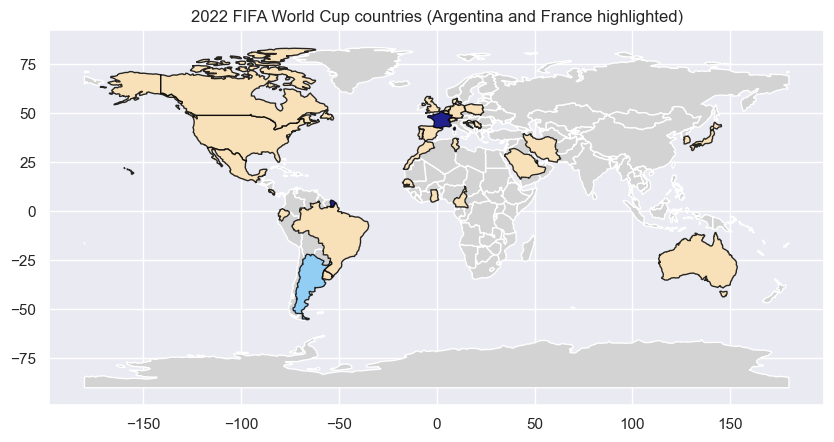

In [11]:
wc_map = wc_participants
wc_map.loc[1, 'Countries'] = 'United Kingdom'
wc_map.Countries = wc_map.Countries.str.title()
wc_map.loc[3, 'Countries'] = 'United States of America'
wc_map = wc_map.drop(index=16).reset_index()['Countries']
wc_map.loc[22] = 'South Korea'

ax = countries.plot(color='lightgray', figsize=(10, 8))
for country in wc_map:
    if country == 'France':
        patch(ax, country, 'navy')
    elif country == 'Argentina':
        patch(ax, country, 'lightskyblue')
    else:
        patch(ax, country, 'moccasin')

plt.title("2022 FIFA World Cup countries (Argentina and France highlighted)")
plt.show()

## Total of goals per team

In [12]:
home = matches[['TEAM1', 'NUMBER_OF_GOALS_TEAM1']]
away = matches[['TEAM2', 'NUMBER_OF_GOALS_TEAM2']]

In [13]:
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [14]:
goals = pd.concat([home, away], axis=0)
goals = goals.groupby('Countries').sum()
goals = goals.sort_values(by='Goals', ascending=False)
goals.head(10)

,Goals
Countries,
FRANCE,16
ARGENTINA,15
ENGLAND,13
PORTUGAL,12
NETHERLANDS,10
SPAIN,9
BRAZIL,8
CROATIA,8
GERMANY,6


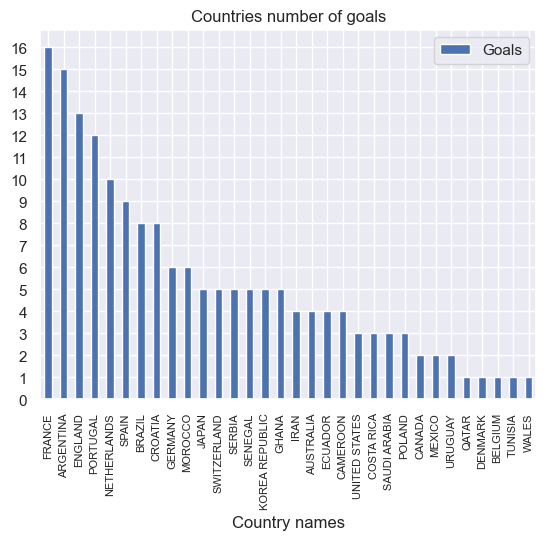

In [15]:
goals.plot.bar()
plt.xticks(fontsize=8)
plt.title("Countries number of goals")
plt.xlabel('Country names')
plt.yticks(range(17))
plt.show()

## Total of goals per group in the group phase

In [16]:
groups_matches = matches[matches.CATEGORY.str.startswith('Group')]
matches_goals = groups_matches.NUMBER_OF_GOALS_TEAM1 + groups_matches.NUMBER_OF_GOALS_TEAM2
groups_goals = pd.concat([groups_matches.CATEGORY, matches_goals], axis=1)
groups_goals.columns = ['Group', 'Goals']
groups_goals = groups_goals.groupby('Group').sum()
groups_goals

,Goals
Group,
Group A,15
Group B,16
Group C,12
Group D,11
Group E,22
Group F,11
Group G,16
Group H,17


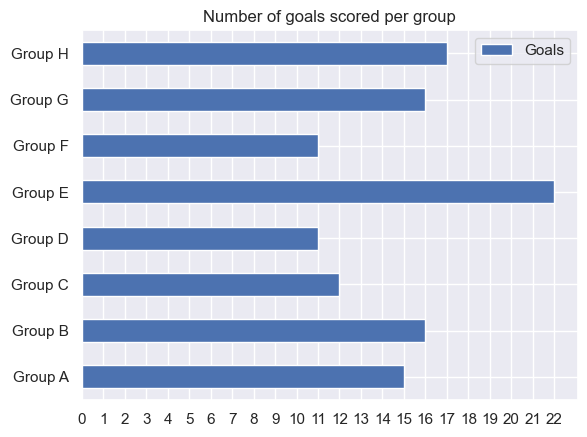

In [17]:
groups_goals.plot.barh()
plt.xticks(range(23))
plt.ylabel('')
plt.title('Number of goals scored per group')
plt.show()

## Total of goals scored in playoffs

In [18]:
playoffs = matches[matches.CATEGORY.str.startswith('Group') == False]
matches_goals = playoffs.NUMBER_OF_GOALS_TEAM1 + playoffs.NUMBER_OF_GOALS_TEAM2
playoffs_goals = pd.concat([playoffs.CATEGORY, playoffs.TEAM1, playoffs.TEAM2, playoffs.NUMBER_OF_GOALS_TEAM1, playoffs.NUMBER_OF_GOALS_TEAM2, matches_goals, playoffs.DATE], axis=1)
playoffs_goals.columns = ['Round', 'Home', 'Away', 'Goals home', 'Goals away', 'Total goals', 'Date']
playoffs_goals

,Round,Home,Away,Goals home,Goals away,Total goals,Date
48,Round of 16,NETHERLANDS,UNITED STATES,3,1,4,2022-12-03 16:00:00
49,Round of 16,ARGENTINA,AUSTRALIA,2,1,3,2022-12-03 20:00:00
50,Round of 16,FRANCE,POLAND,3,1,4,2022-12-04 16:00:00
51,Round of 16,ENGLAND,SENEGAL,3,0,3,2022-12-04 20:00:00
52,Round of 16,JAPAN,CROATIA,1,1,2,2022-12-05 16:00:00
53,Round of 16,BRAZIL,KOREA REPUBLIC,4,1,5,2022-12-05 20:00:00
54,Round of 16,MOROCCO,SPAIN,0,0,0,2022-12-06 16:00:00
55,Round of 16,PORTUGAL,SWITZERLAND,6,1,7,2022-12-06 20:00:00
56,Quarter-final,CROATIA,BRAZIL,1,1,2,2022-12-09 16:00:00
57,Quarter-final,NETHERLANDS,ARGENTINA,2,2,4,2022-12-09 20:00:00


In [19]:
total_playoffs_goals = playoffs_goals[['Round', 'Total goals']]
total_playoffs_goals = total_playoffs_goals.groupby('Round', sort=False).sum()
total_playoffs_goals = total_playoffs_goals.reset_index()
total_playoffs_goals

,Round,Total goals
0,Round of 16,28
1,Quarter-final,10
2,Semi-final,5
3,Play-off for third place,3
4,Final,6


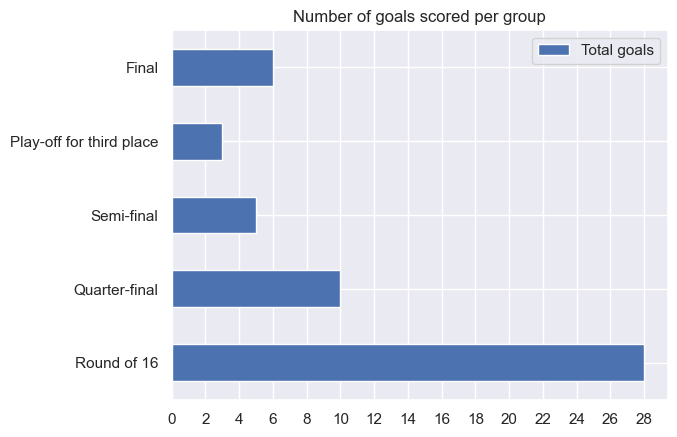

In [20]:
total_playoffs_goals.plot.barh(x='Round', y='Total goals')
plt.xticks(range(0, 29, 2))
plt.ylabel('')
plt.title('Number of goals scored per group')
plt.show()

### Building dataframe with argentinian goals throughout playoffs

In [21]:
arg_playoffs_home = playoffs_goals[playoffs_goals.Home == 'ARGENTINA']
arg_playoffs_home = arg_playoffs_home[['Round', 'Goals home', 'Date']]
arg_playoffs_home.columns = ['Round', 'Goals', 'Date']

arg_playoffs_away = playoffs_goals[playoffs_goals.Away == 'ARGENTINA']
arg_playoffs_away = arg_playoffs_away[['Round', 'Goals away', 'Date']]
arg_playoffs_away.columns = ['Round', 'Goals', 'Date']

In [22]:
arg_playoffs_goals = pd.concat([arg_playoffs_home, arg_playoffs_away], axis=0).sort_values(by='Date')
arg_playoffs_goals = arg_playoffs_goals[['Round', 'Goals']]
arg_playoffs_goals.columns = ['Round', 'Argentina goals']
arg_playoffs_goals = arg_playoffs_goals.reset_index(drop=True)
arg_playoffs_goals

,Round,Argentina goals
0,Round of 16,2
1,Quarter-final,2
2,Semi-final,3
3,Final,3


### Building dataframe with french goals throughout playoffs

In [23]:
fra_playoffs_home = playoffs_goals[playoffs_goals.Home == 'FRANCE']
fra_playoffs_home = fra_playoffs_home[['Round', 'Goals home', 'Date']]
fra_playoffs_home.columns = ['Round', 'Goals', 'Date']

fra_playoffs_away = playoffs_goals[playoffs_goals.Away == 'FRANCE']
fra_playoffs_away = fra_playoffs_away[['Round', 'Goals away', 'Date']]
fra_playoffs_away.columns = ['Round', 'Goals', 'Date']

In [24]:
fra_playoffs_goals = pd.concat([fra_playoffs_home, fra_playoffs_away], axis=0).sort_values(by='Date')
fra_playoffs_goals = fra_playoffs_goals[['Round', 'Goals']]
fra_playoffs_goals.columns = ['Round', 'France goals']
fra_playoffs_goals = fra_playoffs_goals.reset_index(drop=True)
fra_playoffs_goals

,Round,France goals
0,Round of 16,3
1,Quarter-final,2
2,Semi-final,2
3,Final,3


### Dataframe with argentinian and french goals per playoff round compared to total goals

In [25]:
finalists_games = total_playoffs_goals[total_playoffs_goals.Round != 'Play-off for third place'].reset_index()
finalists_goals = pd.concat([arg_playoffs_goals.Round, arg_playoffs_goals['Argentina goals'], fra_playoffs_goals['France goals'], finalists_games['Total goals']], axis=1)
finalists_goals

,Round,Argentina goals,France goals,Total goals
0,Round of 16,2,3,28
1,Quarter-final,2,2,10
2,Semi-final,3,2,5
3,Final,3,3,6


### Argentina and France goal participation throughout playoff

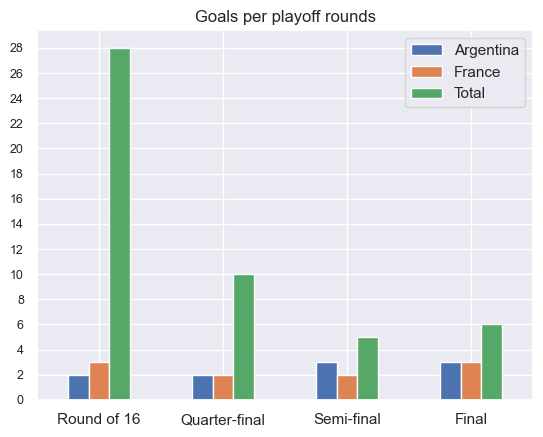

In [26]:
finalists_goals.plot.bar(x='Round', y=['Argentina goals', 'France goals', 'Total goals'], stacked=False)

plt.yticks(range(0, 29, 2), fontsize=9)
plt.xticks(rotation=0)
plt.xlabel('')
plt.legend(['Argentina', 'France', 'Total'], loc='upper right')
plt.title('Goals per playoff rounds')
plt.show()

## Argentina matches

In [27]:
argentina_home = matches.loc[matches.TEAM1 == 'ARGENTINA']
argentina_away = matches.loc[matches.TEAM2 == 'ARGENTINA']
argentina = pd.concat([argentina_home, argentina_away], axis=0).sort_values(by='DATE', ascending=True)

### 2nd greater ball possession against the only team to whom they lost

In [28]:
argentina_home = argentina_home[['TEAM2', 'POSSESSION_TEAM1', 'POSSESSION_TEAM2', 'POSSESSION_IN_CONTEST', 'DATE']]
argentina_home.columns = ['OPPONENT', 'POSSESSION', 'DEFENDING', 'IN CONTEST', 'DATE']

argentina_away = argentina_away[['TEAM1', 'POSSESSION_TEAM2', 'POSSESSION_TEAM1', 'POSSESSION_IN_CONTEST', 'DATE']]
argentina_away.columns = ['OPPONENT', 'POSSESSION', 'DEFENDING', 'IN CONTEST', 'DATE']

arg_poss = pd.concat([argentina_home, argentina_away], axis=0).sort_values(by='DATE', ascending=True).reset_index(drop=True)
arg_poss

,OPPONENT,POSSESSION,DEFENDING,IN CONTEST,DATE
0,SAUDI ARABIA,64,24,12,2022-11-22 11:00:00
1,MEXICO,50,36,14,2022-11-26 20:00:00
2,POLAND,67,24,9,2022-11-30 20:00:00
3,AUSTRALIA,53,35,12,2022-12-03 20:00:00
4,NETHERLANDS,44,45,11,2022-12-09 20:00:00
5,CROATIA,34,54,12,2022-12-13 20:00:00
6,FRANCE,46,40,14,2022-12-18 16:00:00


### Ball situation for Argentina through time
#### Bar plot

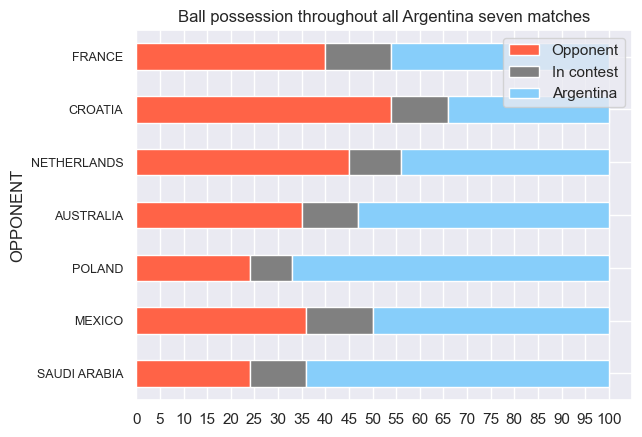

In [29]:
arg_poss.plot.barh(x='OPPONENT', y=['DEFENDING', 'IN CONTEST', 'POSSESSION'], stacked=True, color={'DEFENDING': 'tomato', 'IN CONTEST': 'gray', 'POSSESSION': 'lightskyblue'})

plt.xticks(range(0, 101, 5))
plt.legend(['Opponent', 'In contest', 'Argentina'], loc='upper right')
plt.yticks(fontsize=9)
plt.title('Ball possession throughout all Argentina seven matches')
plt.show()

#### Line plot

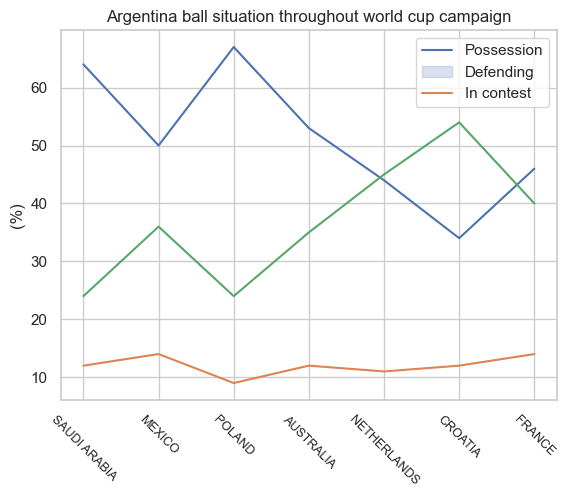

In [30]:
sns.set_theme(style='whitegrid')
sns.lineplot(data=arg_poss, x='OPPONENT', y='POSSESSION')
sns.lineplot(data=arg_poss, x='OPPONENT', y='IN CONTEST')
sns.lineplot(data=arg_poss, x='OPPONENT', y='DEFENDING')

plt.ylabel("(%)")
plt.xticks(rotation=315, fontsize=9)
plt.xlabel("")
plt.title("Argentina ball situation throughout world cup campaign")
plt.legend(['Possession', 'Defending', 'In contest'])
plt.show()

## Total of on target attempts

In [31]:
on_target = matches[['TEAM1', 'TEAM2', 'ON_TARGET_ATTEMPTS_TEAM1', 'ON_TARGET_ATTEMPTS_TEAM2']]
on_target_home = on_target[['TEAM1', 'ON_TARGET_ATTEMPTS_TEAM1']]
on_target_home.columns = ['Country', 'On target attempts']

on_target_away = on_target[['TEAM2', 'ON_TARGET_ATTEMPTS_TEAM2']]
on_target_away.columns = ['Country', 'On target attempts']

on_target = pd.concat([on_target_home, on_target_away], axis=0)
on_target = on_target.groupby('Country').sum().reset_index().sort_values(by='On target attempts', ascending=False)

#### All quarterfinalists are in the top 10 with most goals attempts on target. The top5 contemplates 3 semifinalists
Brazil is in the top2 but ended the world cup in the 7th position.

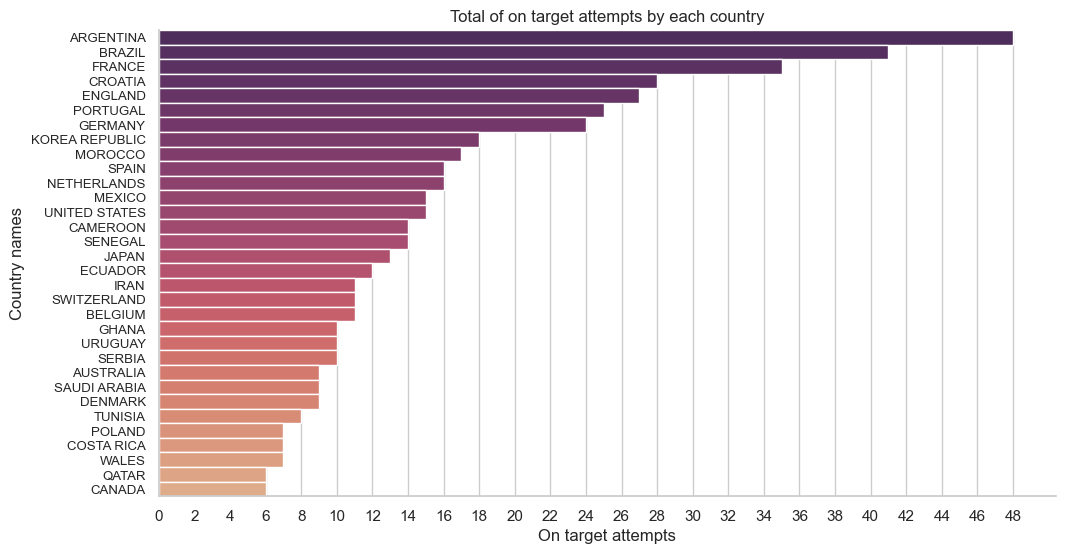

In [32]:
plot = sns.catplot(
    data=on_target, x='On target attempts', y='Country', 
    kind="bar", height=5.5, aspect=2, width=1, orient='h', palette='flare_r'
)

plt.yticks(fontsize=9.5)
plt.title("Total of on target attempts by each country")
plt.ylabel('Country names')
plt.xticks(range(0, 49, 2))
plt.show()

## Midfield

In [33]:
home_rbm_clb = matches[['TEAM1', 'RECEPTIONS_BETWEEN_MIDFIELD_AND_DEFENSIVE_LINES_TEAM1', 'COMPLETED_DEFENSIVE_LINE_BREAKS_TEAM1']]
home_rbm_clb.columns = ['Country', 'Receptions between midfield and defensive lines', 'Completed defensive line breaks']

away_rbm_clb = matches[['TEAM2', 'RECEPTIONS_BETWEEN_MIDFIELD_AND_DEFENSIVE_LINES_TEAM2', 'COMPLETED_DEFENSIVE_LINE_BREAKS_TEAM2']]
away_rbm_clb.columns = ['Country', 'Receptions between midfield and defensive lines', 'Completed defensive line breaks']

rbm_clb = pd.concat([home_rbm_clb, away_rbm_clb], axis=0)
rbm_clb = rbm_clb.groupby('Country').sum().sort_values(by='Receptions between midfield and defensive lines', ascending=True).reset_index()

hits_rbm_clb = rbm_clb[rbm_clb['Receptions between midfield and defensive lines'] >= 52]

### Top10 countries with the most receptions between midfield and defensive lines and completed defensive line breaks
#### Seven of them were quarterfinalists. Spain appears in thirds, even though played only 4 matches.
In order to break defensive lines, there tends to be more receptions by midfielders between lines

<AxesSubplot: ylabel='Country'>

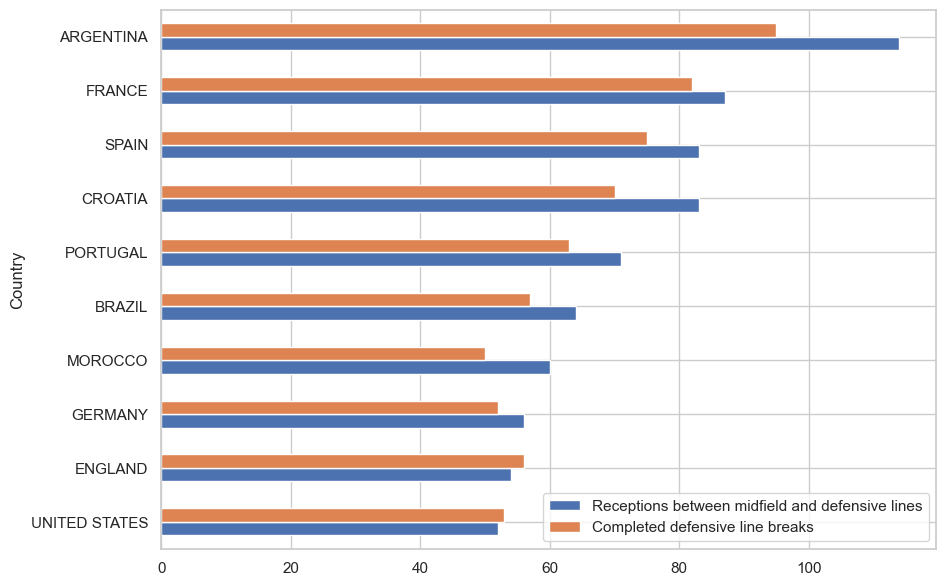

In [34]:
hits_rbm_clb.plot.barh(x='Country', y=['Receptions between midfield and defensive lines', 'Completed defensive line breaks'], figsize=(10, 7))

## Pass accuracy from all matches

In [35]:
passes_home = matches[['TEAM1', 'CATEGORY', 'PASSES_TEAM1', 'PASSES_COMPLETED_TEAM1', 'DATE']]
passes_home.columns = ['Country', 'Round', 'Passes', 'Passes completed', 'Date']

passes_away = matches[['TEAM2', 'CATEGORY', 'PASSES_TEAM2', 'PASSES_COMPLETED_TEAM2', 'DATE']]
passes_away.columns = ['Country', 'Round', 'Passes', 'Passes completed', 'Date']

passes = pd.concat([passes_home, passes_away], axis=0)
passes['Passes not completed'] = passes.Passes - passes['Passes completed']
passes['Passes accuracy'] = (passes['Passes completed'] / passes.Passes) * 100
passes = passes.sort_values(by='Passes accuracy', ascending=False)

date = passes.pop('Date')
passes['Date'] = date.astype(str)
passes.Date = passes.Date.str[0:16]
passes.loc[passes.Round.str.startswith('Group'), 'Round'] = 'Group Stage'
passes.head()

,Country,Round,Passes,Passes completed,Passes not completed,Passes accuracy,Date
10,SPAIN,Group Stage,1061,1003,58,94.533459,2022-11-23 17:00
38,ARGENTINA,Group Stage,862,814,48,94.431555,2022-11-30 20:00
32,NETHERLANDS,Group Stage,795,740,55,93.081761,2022-11-29 16:00
54,SPAIN,Round of 16,1041,967,74,92.891451,2022-12-06 16:00
42,SPAIN,Group Stage,1070,992,78,92.710280,2022-12-01 20:00


### The more passes given, the more their accuracy increases with a similar logarithm curve tendency.

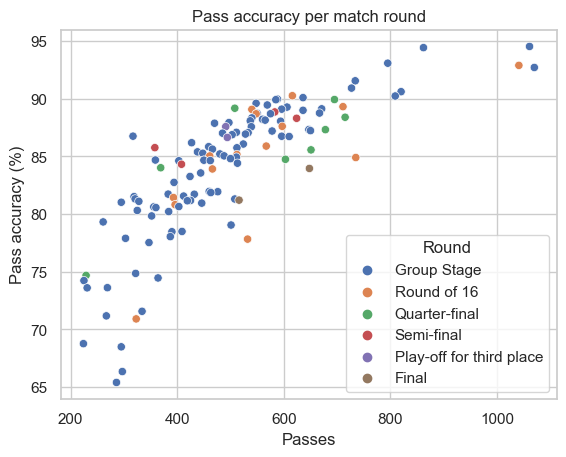

In [36]:
sns.scatterplot(data=passes, x='Passes', y='Passes accuracy', hue='Round')
plt.ylabel("Pass accuracy (%)")
plt.title("Pass accuracy per match round")
plt.show()

## The pass accuracy for the group stages' first places throughout their campaign

In [37]:
first_places = ['NETHERLANDS', 'ENGLAND', 'ARGENTINA', 'FRANCE', 'JAPAN', 'MOROCCO', 'BRAZIL', 'PORTUGAL']
firsts = pd.DataFrame()

for country in first_places:
    first = passes[passes.Country == country]
    firsts = pd.concat([firsts, first], axis=0)

firsts['Passes not completed'] = firsts.Passes - firsts['Passes completed']
firsts['Passes accuracy'] = (firsts['Passes completed'] / firsts.Passes) * 100
firsts = firsts.sort_values(by='Passes accuracy', ascending=False)

date = firsts.pop('Date')
firsts['Date'] = date.astype(str)
firsts.Date = firsts.Date.str[0:16]

firsts = firsts.reset_index(drop=True)
firsts.head()

,Country,Round,Passes,Passes completed,Passes not completed,Passes accuracy,Date
0,ARGENTINA,Group Stage,862,814,48,94.431555,2022-11-30 20:00
1,NETHERLANDS,Group Stage,795,740,55,93.081761,2022-11-29 16:00
2,FRANCE,Group Stage,734,672,62,91.553134,2022-11-22 20:00
3,BRAZIL,Round of 16,616,556,60,90.259740,2022-12-05 20:00
4,ENGLAND,Group Stage,809,730,79,90.234858,2022-11-21 14:00


### Pass accuracy heatmap for groups' top10 

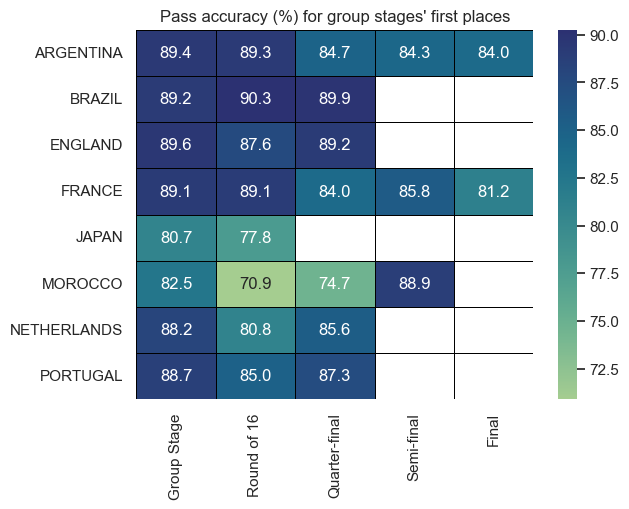

In [38]:
firsts_heatmap = firsts.pivot_table(index='Country', columns='Round', values='Passes accuracy', aggfunc='mean')
firsts_heatmap = firsts_heatmap[['Group Stage', 'Round of 16', 'Quarter-final', 'Semi-final', 'Final']]

sns.heatmap(firsts_heatmap, annot=True, fmt='.1f', cmap='crest', linewidth=.5, linecolor='black')
plt.title("Pass accuracy (%) for group stages' first places")
plt.xlabel('')
plt.ylabel('')
plt.show()

### Pass accuracy line plot for groups' top10 

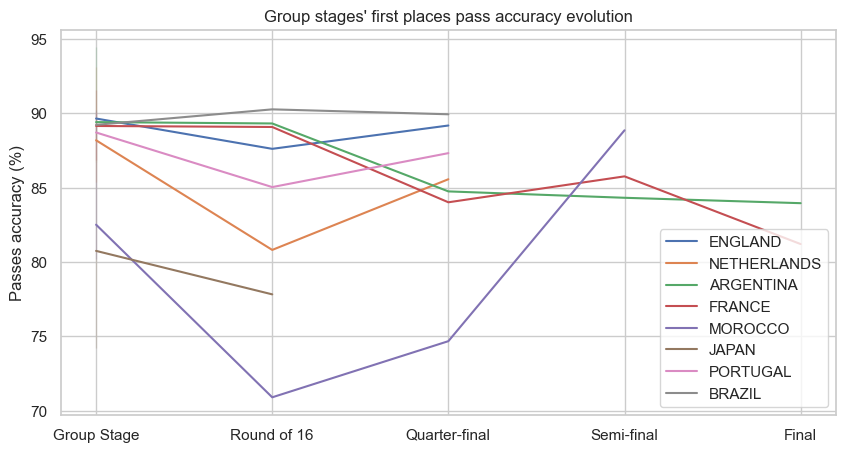

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))

firsts_lineplot = firsts.sort_values(by='Date', ascending=True).reset_index(drop=True)
firsts_lineplot = firsts_lineplot[firsts_lineplot.Round != 'Play-off for third place']

sns.lineplot(data=firsts_lineplot, x='Round', y='Passes accuracy', hue='Country')
plt.legend(loc='lower right')
plt.ylabel('Passes accuracy (%)')
plt.xlabel('')
plt.title("Group stages' first places pass accuracy evolution")
plt.show()

## Playoffs pass accuracy

In [40]:
playoffs = matches[matches.CATEGORY.str.startswith('Group') == False]

po_passes_home = playoffs[['TEAM1', 'CATEGORY', 'PASSES_TEAM1', 'PASSES_COMPLETED_TEAM1', 'DATE']]
po_passes_home.columns = ['Country', 'Round', 'Passes', 'Passes completed', 'Date']

po_passes_away = playoffs[['TEAM2', 'CATEGORY', 'PASSES_TEAM2', 'PASSES_COMPLETED_TEAM2', 'DATE']]
po_passes_away.columns = ['Country', 'Round', 'Passes', 'Passes completed', 'Date']

po_passes = pd.concat([po_passes_home, po_passes_away], axis=0)
po_passes['Passes not completed'] = po_passes.Passes - po_passes['Passes completed']
po_passes['Passes accuracy'] = (po_passes['Passes completed'] / po_passes.Passes) * 100
po_passes = po_passes.sort_values(by='Passes accuracy', ascending=False)

date = po_passes.pop('Date')
po_passes['Date'] = date.astype(str)
po_passes.Date = po_passes.Date.str[0:16]
po_passes.head(10)

,Country,Round,Passes,Passes completed,Passes not completed,Passes accuracy,Date
54,SPAIN,Round of 16,1041,967,74,92.891451,2022-12-06 16:00
53,BRAZIL,Round of 16,616,556,60,90.259740,2022-12-05 20:00
56,BRAZIL,Quarter-final,695,625,70,89.928058,2022-12-09 16:00
49,ARGENTINA,Round of 16,711,635,76,89.310830,2022-12-03 20:00
59,ENGLAND,Quarter-final,508,453,55,89.173228,2022-12-10 20:00
50,FRANCE,Round of 16,540,481,59,89.074074,2022-12-04 16:00
61,MOROCCO,Semi-final,583,518,65,88.850772,2022-12-14 20:00
53,KOREA REPUBLIC,Round of 16,548,486,62,88.686131,2022-12-05 20:00
56,CROATIA,Quarter-final,715,632,83,88.391608,2022-12-09 16:00
60,CROATIA,Semi-final,624,551,73,88.301282,2022-12-13 20:00


### Total of passes during a match tends to be concentrated between 400 and 700 passes. 

Text(0.5, 1.0, 'Countries pass accuracy per match round throughout playoffs')

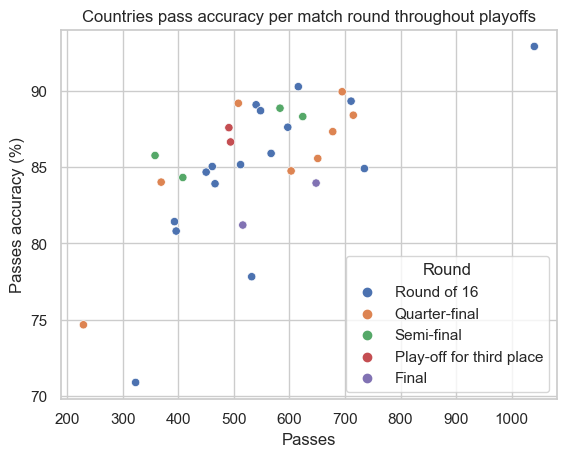

In [41]:
sns.scatterplot(data=po_passes, x="Passes", y="Passes accuracy", hue='Round')
plt.ylabel('Passes accuracy (%)')
plt.title('Countries pass accuracy per match round throughout playoffs')

## Pass accuracy in quarter-finals 

In [42]:
quarter_finals = matches[matches.CATEGORY == 'Quarter-final']

qf_passes_home = quarter_finals[['TEAM1', 'PASSES_TEAM1', 'PASSES_COMPLETED_TEAM1', 'DATE']]
qf_passes_home.columns = ['Country', 'Passes', 'Passes completed', 'Date']

qf_passes_away = quarter_finals[['TEAM2', 'PASSES_TEAM2', 'PASSES_COMPLETED_TEAM2', 'DATE']]
qf_passes_away.columns = ['Country', 'Passes', 'Passes completed', 'Date']

qf_passes = pd.concat([qf_passes_home, qf_passes_away], axis=0).sort_values(by='Passes', ascending=True)
qf_passes['Passes not completed'] = qf_passes.Passes - qf_passes['Passes completed']
qf_passes['Passes accuracy'] = (qf_passes['Passes completed'] / qf_passes.Passes) * 100

date = qf_passes.pop('Date')
qf_passes['Date'] = date.astype(str)
qf_passes.Date = qf_passes.Date.str[0:16]
qf_passes

,Country,Passes,Passes completed,Passes not completed,Passes accuracy,Date
58,MOROCCO,229,171,58,74.672489,2022-12-10 16:00
59,FRANCE,369,310,59,84.010840,2022-12-10 20:00
59,ENGLAND,508,453,55,89.173228,2022-12-10 20:00
57,ARGENTINA,603,511,92,84.742952,2022-12-09 20:00
57,NETHERLANDS,651,557,94,85.560676,2022-12-09 20:00
58,PORTUGAL,678,592,86,87.315634,2022-12-10 16:00
56,BRAZIL,695,625,70,89.928058,2022-12-09 16:00
56,CROATIA,715,632,83,88.391608,2022-12-09 16:00


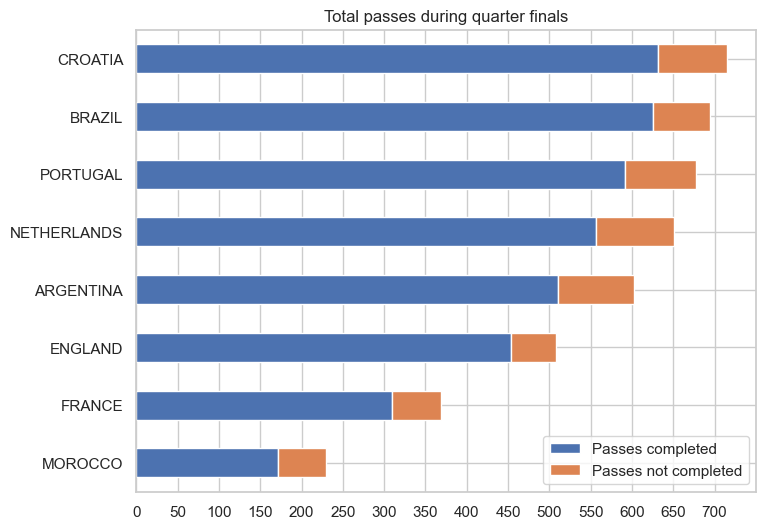

In [43]:
qf_passes.plot.barh(x='Country', y=['Passes completed', 'Passes not completed'], figsize=(8, 6), stacked=True)
plt.xticks(range(0, 716, 50))
plt.ylabel('')
plt.title('Total passes during quarter finals')
plt.show()

### Brazil is the one with highest pass accuracy in the quarter finals

In [44]:
qf_passes = qf_passes.sort_values(by='Passes accuracy', ascending=False)
qf_passes

,Country,Passes,Passes completed,Passes not completed,Passes accuracy,Date
56,BRAZIL,695,625,70,89.928058,2022-12-09 16:00
59,ENGLAND,508,453,55,89.173228,2022-12-10 20:00
56,CROATIA,715,632,83,88.391608,2022-12-09 16:00
58,PORTUGAL,678,592,86,87.315634,2022-12-10 16:00
57,NETHERLANDS,651,557,94,85.560676,2022-12-09 20:00
57,ARGENTINA,603,511,92,84.742952,2022-12-09 20:00
59,FRANCE,369,310,59,84.010840,2022-12-10 20:00
58,MOROCCO,229,171,58,74.672489,2022-12-10 16:00


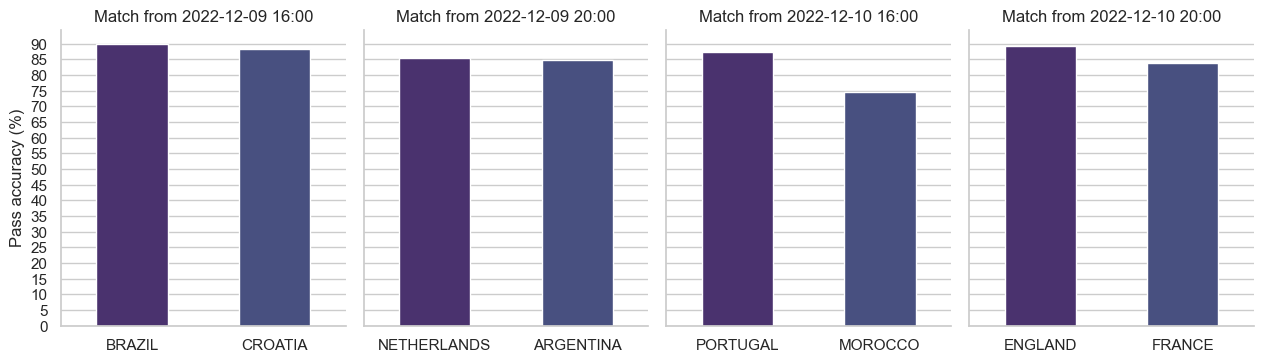

In [45]:
qf_passes = qf_passes.sort_values(by='Date', ascending=True)

g = sns.catplot(
    data=qf_passes, x="Country", y="Passes accuracy", col="Date",
    kind="bar", height=4, aspect=.8, width=.5, sharex=False, color='salmon', palette='viridis'
)

g.set_axis_labels("", "Pass accuracy (%)")
g.set_titles("Match from {col_name}")

plt.yticks(range(0, 91, 5))
plt.show()